In [1]:
import pandas as pd
import numpy as np
#import hyperopt as hp
import sklearn.metrics as met
#import xgboost as xgb
from xgboost import XGBRegressor  # For regression tasks (replace with XGBClassifier for classification)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
import scipy
import matplotlib.pyplot as plt
from time import time
import scipy.stats as stats

from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
import numpy as np


from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [3]:
df = pd.read_csv("C:/Users/Lenovo/Documents/Stats conuslting sem II/data.csv")
df
#plt.plot(range(int(df['ClaimAmount']),df['ClaimAmount'])
np.array(df['ClaimAmount'])

array([2204.  , 2032.49,  556.14, ..., 1204.  , 1204.  , 1675.19])

In [4]:
ID = df['IDpol']
df = df.drop(columns=['ClaimID','ClaimCountRow','IDpol','VehAge_Capped_Grouped','DrivAge_Capped_Grouped' ,'Fines_Capped_Grouped',
                          'BonusMalus_Capped_Grouped','Density_Capped_Grouped','predicted_claim_amount','VehPower','VehBrand_grouped','VehPower_Factor','RegArea'])
X = df.drop('ClaimAmount', axis=1)  # Features
y = np.array(df['ClaimAmount'])  # Target variable
print(X,y)

       ClaimNb  Exposure VehBrand   VehGas  Gender Transmission  Employment  \
0            1      0.66      B11   Diesel  Female    Automatic      Public   
1            1      0.17       B2   Diesel    Male    Automatic     Private   
2            1      0.90      B12  Regular  Female       Manual     Private   
3            1      1.00       B1  Regular    Male    Automatic     Private   
4            2      0.97       B5  Regular  Female    Automatic     Private   
...        ...       ...      ...      ...     ...          ...         ...   
25519        1      0.20      B10  Regular    Male       Manual     Private   
25520        1      0.96       B5  Regular    Male       Manual      Public   
25521        1      1.00      B12  Regular  Female    Automatic     Private   
25522        1      0.96       B2  Regular    Male    Automatic  Unemployed   
25523        1      1.00       B1  Regular  Female    Automatic     Private   

       VehAge_Capped  DrivAge_Capped  Fines_Capped 

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import numpy as np
 
# Check for and handle categorical variables
label_encoder = LabelEncoder()
x_categorical = X.select_dtypes(include=['object']).apply(label_encoder.fit_transform)
x_numerical = X.select_dtypes(exclude=['object']).values
x = pd.concat([pd.DataFrame(x_numerical), x_categorical], axis=1).values

In [6]:
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.1, random_state=2)

In [27]:
reglist =[]
r2list = []
ooblist =[]
rmselist=[]
for j in np.linspace(0,5,5):
    # Fitting Random Forest Regression to the dataset
    regressor = RandomForestRegressor(n_estimators=450, random_state=int(j), oob_score=True)

    # Fit the regressor with x and y data
    fit = regressor.fit(X_train,y_train)
    reglist.append(fit)
    feature_importances = regressor.feature_importances_

    # Print or visualize the importances
    print(feature_importances)

    # Access the OOB Score
    oob_score = regressor.oob_score_
    print(f'Out-of-Bag Score: {oob_score}')
    ooblist.append(oob_score)

    # Making predictions
    predictions = regressor.predict(X_val)

    # Evaluating the model
    rmse = np.sqrt(mean_squared_error(y_val, predictions))

    rmselist.append(rmse)

    r2 = r2_score(y_val, predictions)
    r2list.append(r2)
print(f'Root Mean Squared Error: {rmselist}')
print(f'Out-of-Bag Score: {ooblist}')
print(f'r-squared: {r2list}')

[0.01863926 0.12922487 0.10259602 0.15655882 0.05895057 0.08552076
 0.21697925 0.07277533 0.02453405 0.02501826 0.02406432 0.04207988
 0.03881898 0.00423964]
Out-of-Bag Score: -0.05672985614004533
[0.01830982 0.13023083 0.10198877 0.15755689 0.05912413 0.08470702
 0.21688075 0.07248734 0.02447009 0.025514   0.02401651 0.04201201
 0.03844751 0.00425433]
Out-of-Bag Score: -0.055341390926996636
[0.0183167  0.13029673 0.10145135 0.1575495  0.05933596 0.08478063
 0.21633032 0.07319844 0.02434515 0.02483985 0.02430812 0.04241321
 0.03860717 0.00422688]
Out-of-Bag Score: -0.055325394402627515
[0.01847989 0.13029399 0.10181716 0.15726706 0.05920659 0.0849461
 0.21600052 0.07343436 0.02443585 0.02512723 0.0236991  0.04248203
 0.03845776 0.00435236]
Out-of-Bag Score: -0.05611846544890087
[0.01860108 0.1305679  0.10071527 0.15659385 0.0591522  0.08536656
 0.21707341 0.07389971 0.02470881 0.02475608 0.02376535 0.04191153
 0.03858432 0.00430393]
Out-of-Bag Score: -0.055214666881359564
Root Mean Squ

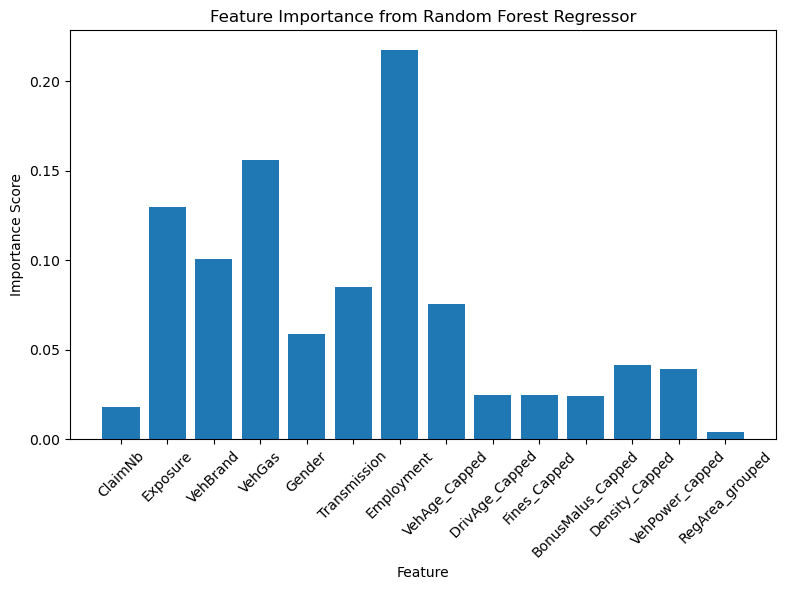

In [21]:

# Example feature names and importances
feature_names = ["ClaimNb",  "Exposure" ,"VehBrand",
                 "VehGas" ,"Gender","Transmission" ,"Employment",
                 "VehAge_Capped", " DrivAge_Capped","Fines_Capped",
                 "BonusMalus_Capped",  "Density_Capped", "VehPower_capped","RegArea_grouped"]

# Create a pandas DataFrame for easier plotting
df = pd.DataFrame({"feature": feature_names, "importance": mfeature_importances})

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(df["feature"], df["importance"])
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.title("Feature Importance from Random Forest Regressor")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()
#plt.ylim(0.6,1.0)

plt.show()

In [10]:
from sklearn.metrics import mean_squared_error, r2_score
 
# Access the OOB Score
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')
 
# Making predictions
predictions = regressor.predict(X_val)
 
# Evaluating the model
rmse = np.sqrt(mean_squared_error(y_val, predictions))
print(f'Root Mean Squared Error: {rmse}')
 
r2 = r2_score(y_val, predictions)
print(f'R-squared: {r2}')

Out-of-Bag Score: -0.07640606534715344
Root Mean Squared Error: 1279.9372159661289
R-squared: -0.1032262903675445


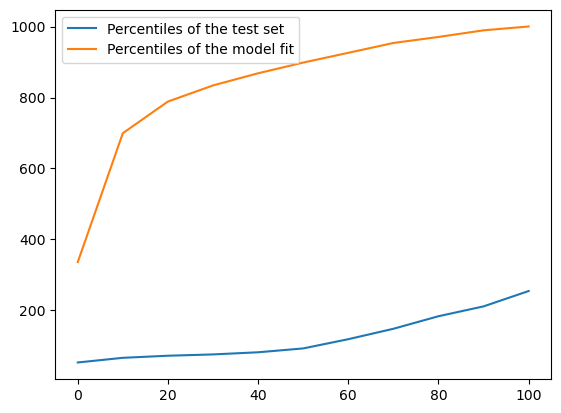

In [11]:

# Define the number of percentiles
n_percentiles = 10  # You can adjust this value
plot_array = np.linspace(0,100,11)
# Calculate percentiles of the target variable
percentiles_test = np.percentile(y_val, range(n_percentiles + 1))
percentiles_fit = np.percentile(predictions, range(n_percentiles + 1))
plt.plot(plot_array,percentiles_test,label="Percentiles of the test set")
plt.plot(plot_array,percentiles_fit,label="Percentiles of the model fit")
plt.legend()
plt.show()
#plt.set_yticklabels([])
# # Initialize lists to store errors per percentile
# mse_per_percentile = []
# mae_per_percentile = []

# # Loop through each percentile
# for i in range(n_percentiles+1):
#     # Select data points within the current percentile range
#     mask = (y_test >= percentiles[i-1]) & (y_test < percentiles[i])
#     y_test_subset = y_test[mask]
#     predictions_subset = predictions[mask]

#     # Calculate Mean Squared Error (MSE) and Mean Absolute Error (MAE) for this percentile
#     mse = met.mean_squared_error(y_test_subset, predictions_subset)
#     mae = met.mean_absolute_error(y_test_subset, predictions_subset)

#     mse_per_percentile.append(mse)
#     mae_per_percentile.append(mae)

# # Print or plot the results (e.g., using matplotlib)
# print("MSE per percentile:", mse_per_percentile)
# print("MAE per percentile:", mae_per_percentile)
# plt.plot(mae_per_percentile)
# # You can plot these values vs. percentile to visualize the trends